In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 10)
plt.rcParams['figure.figsize'] = (10, 6)

## Exercise 1

Figure 9.32 shows the ACFs for 36 random numbers, 360 random numbers and 1,000 random numbers.



a. Explain the differences among these figures. Do they all indicate that the data are white noise?

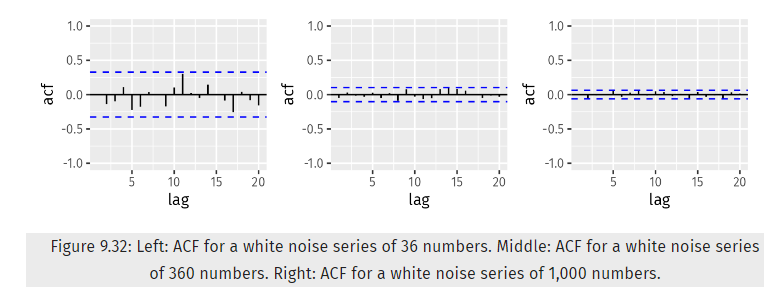

All three ACF plots indicates white noise because there are not significant autocorrelation in any of the plots. The main difference among the plots is the data size begining with 36 number on the left plot then 360 numbers in the middle and 1000 numbers in the right plot. As the data set size get larger the narrower the significant boundaries become because with more data the ACF becomes more precise and random datapoints have less influence, leading to a narrower boundaries.

b. Why are the critical values at different distances from the mean of zero? Why are the autocorrelations different in each figure when they each refer to white noise?

The critical values are different because of the size of the data as more data is available lower the critical values are. As for why the autocorrelations are different is due to the random fluctuations in the data. With a smaller data size these random fluctuations have a relatively larger impact on the ACF compared to a larger data size. That is why the correlation magnitudes on the left plot is larger compared to the rest since it has the smallest data size.

## Exercise 2

A classic example of a non-stationary series are stock prices. Plot the daily closing prices for Amazon stock (contained in gafa_stock), along with the ACF and PACF. Explain how each plot shows that the series is non-stationary and should be differenced.

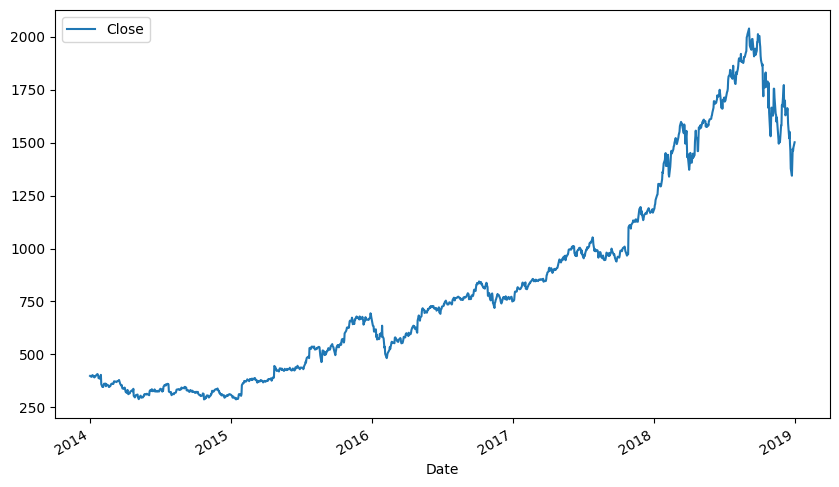

In [68]:
stocks = pd.read_csv('https://raw.githubusercontent.com/NickAMC/NickAMC.github.io/main/DATA_624_S24/rdata/gafa_stock.csv', parse_dates= ['Date'], index_col='Date')

amazon = stocks.query('Symbol == "AMZN"')[['Close']]

amazon.plot()
plt.show()

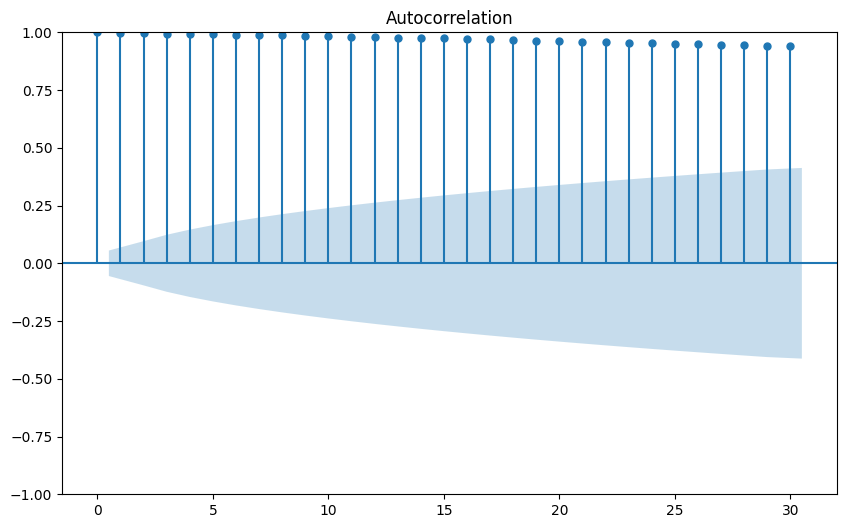

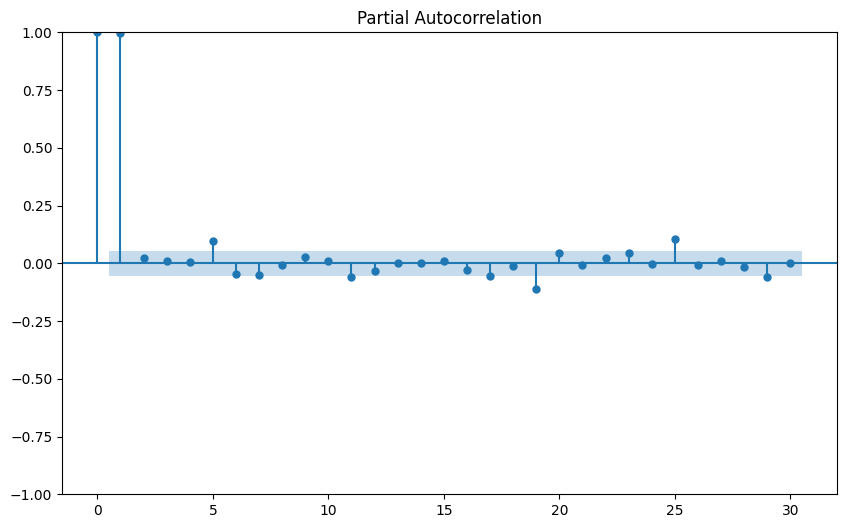

In [69]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf (amazon, lags = 30) # chose 30 since its daily data. other choices were 7 or 14
plt.show()

plot_pacf(amazon, lags = 30)
plt.show()

The ACF plot demonstrates non-stationarity in the `amazon` data. The slow decay of autocorrelation values as the lag approaches 30 indicates a dependence on past values. Additionally, the PACF shows multiple significant correlations beyond lag zero, indicative of significant correlations between lagged errors.

## Exercise 3

For the following series, find an appropriate Box-Cox transformation and order of differencing in order to obtain stationary data.



a.Turkish GDP from `global_economy`.

In [70]:
global_economy = pd.read_csv('https://raw.githubusercontent.com/NickAMC/NickAMC.github.io/main/DATA_624_S24/rdata/global_economy.csv', parse_dates=['Year'], index_col='Year')

turkey_gdp = global_economy.query('Country == "Turkey"')[['GDP']]

In [71]:
from statsmodels.tsa.stattools import adfuller, kpss
# using the augmented dicky fuller test 
def adfuller_test(series) : 
     result = adfuller(series)
     print('ADF Statistic: %f' % result[0]) # the more negative this value is the more likely ts is stationary
     print('p-value: %f' % result[1])       # if p-values is less than 0.05 we reject the null: ts is non-stationary
     print('Critical Values:')
     for key, value in result[4].items():
          print('\t%s: %.3f' % (key, value))
     print(f'Result: The series is {"not " if result[1] > 0.05 else ""}stationary')

def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

In [72]:
#| warning : false
#| message : false

adfuller_test(turkey_gdp)
kpss_test(turkey_gdp)

ADF Statistic: 2.940485
p-value: 1.000000
Critical Values:
	1%: -3.581
	5%: -2.927
	10%: -2.602
Result: The series is not stationary
KPSS Statistic: 1.0019195473013205
p-value: 0.01
num lags: 4
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


C:\Users\nickc\AppData\Local\Temp\ipykernel_61000\726354897.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


In [73]:
from scipy.stats import boxcox

gdp_boxcox, lmbda = boxcox(turkey_gdp['GDP'])

turkey_gdp['gdp_boxcox'] = gdp_boxcox

print(f'Best lambda esitmate for Turkish GDP: {lmbda}')

Best lambda esitmate for Turkish GDP: 0.03601462574818967


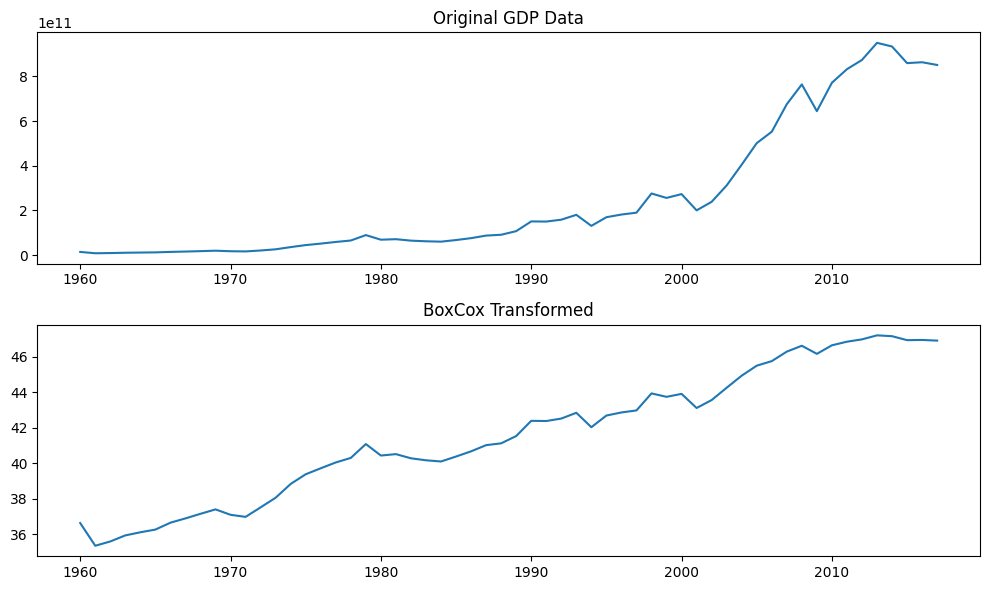

In [74]:
fig, ax = plt.subplots(2,1)
ax[0].plot(turkey_gdp['GDP'])
ax[0].set_title('Original GDP Data')
ax[1].plot(turkey_gdp['gdp_boxcox'])
ax[1].set_title('BoxCox Transformed')
plt.tight_layout()
plt.show()

In [75]:
#| warning : false
#| message : false

# assuming we are differencing the transformed time series

gdp_boxcox_diff = turkey_gdp['gdp_boxcox'].diff().dropna()

adfuller_test(gdp_boxcox_diff)
kpss_test(gdp_boxcox_diff)

ADF Statistic: -4.343396
p-value: 0.000373
Critical Values:
	1%: -3.560
	5%: -2.918
	10%: -2.597
Result: The series is stationary
KPSS Statistic: 0.06480360009853287
p-value: 0.1
num lags: 1
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\nickc\AppData\Local\Temp\ipykernel_61000\726354897.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


The best lambda estimate for the BoxCox transformation 0.036 and the time series data was stationary after one order of differencing.

b. Accommodation takings in the state of Tasmania from `aus_accommodation`.

In [76]:
#| warning = false
#| message = false

aus_accommodation = pd.read_csv('c:/Users/nickc/DataScience/NickAMC.github.io/DATA_624_S24/rdata/aus_accomodation.csv', parse_dates=['Date'], index_col='Date')

tasmania = aus_accommodation.query('State == "Tasmania"')[['Takings']]

C:\Users\nickc\AppData\Local\Temp\ipykernel_61000\2384435477.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  aus_accommodation = pd.read_csv('c:/Users/nickc/DataScience/NickAMC.github.io/DATA_624_S24/rdata/aus_accomodation.csv', parse_dates=['Date'], index_col='Date')


In [77]:
#| warning : false
#| message : false

adfuller_test(tasmania)
kpss_test(tasmania)

ADF Statistic: 0.104930
p-value: 0.966396
Critical Values:
	1%: -3.535
	5%: -2.907
	10%: -2.591
Result: The series is not stationary
KPSS Statistic: 1.5036891770531675
p-value: 0.01
num lags: 4
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


C:\Users\nickc\AppData\Local\Temp\ipykernel_61000\726354897.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


In [78]:
takings_boxcox, lmbda = boxcox(tasmania['Takings'])

tasmania['takings_boxcox'] = takings_boxcox

print(f'Best lambda esitmate for Tasmania Takings: {lmbda}')

Best lambda esitmate for Tasmania Takings: 0.31489193114284464


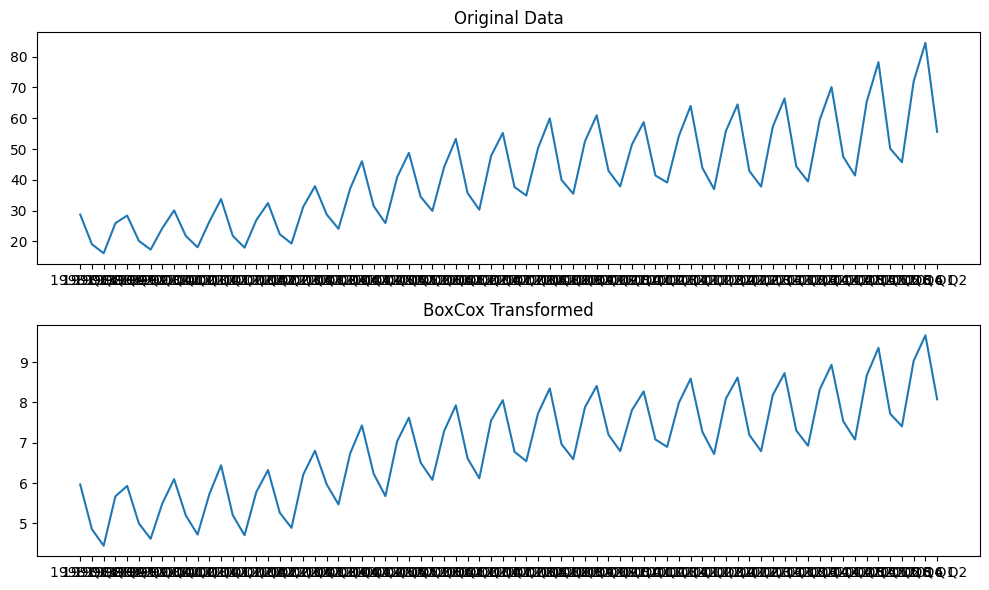

In [79]:
fig, ax = plt.subplots(2,1)
ax[0].plot(tasmania['Takings'])
ax[0].set_title('Original Data')
ax[1].plot(tasmania['takings_boxcox'])
ax[1].set_title('BoxCox Transformed')
plt.tight_layout()
plt.show()

In [80]:
#| warning : false
#| message : false

takings_boxcox_diff = turkey_gdp['gdp_boxcox'].diff().dropna()

adfuller_test(takings_boxcox_diff)
kpss_test(takings_boxcox_diff)

ADF Statistic: -4.343396
p-value: 0.000373
Critical Values:
	1%: -3.560
	5%: -2.918
	10%: -2.597
Result: The series is stationary
KPSS Statistic: 0.06480360009853287
p-value: 0.1
num lags: 1
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\nickc\AppData\Local\Temp\ipykernel_61000\726354897.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


The best lambda estimate for the BoxCox transformation 0.32 and the time series data was stationary after one order of differencing. The transformation is very close to a cube root.

c. Monthly sales from `souvenirs`.

In [81]:
#| warning : false
#| message : false

souvenirs = pd.read_csv('c:/Users/nickc/DataScience/souvenirs.csv', parse_dates=['Month'], index_col='Month')[['Sales']]

C:\Users\nickc\AppData\Local\Temp\ipykernel_61000\1032812664.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  souvenirs = pd.read_csv('c:/Users/nickc/DataScience/souvenirs.csv', parse_dates=['Month'], index_col='Month')[['Sales']]


In [82]:
#| warning : false
#| message : false

adfuller_test(souvenirs)
kpss_test(souvenirs)

ADF Statistic: 2.316542
p-value: 0.998965
Critical Values:
	1%: -3.526
	5%: -2.903
	10%: -2.589
Result: The series is not stationary
KPSS Statistic: 1.1649199329792983
p-value: 0.01
num lags: 4
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


C:\Users\nickc\AppData\Local\Temp\ipykernel_61000\726354897.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


In [83]:
sales_boxcox, lmbda = boxcox(souvenirs['Sales'])
souvenirs['sales_boxcox'] = sales_boxcox
print(f'Best lambda esitmate for Tasmania Takings: {lmbda}')

Best lambda esitmate for Tasmania Takings: -0.216726069234196


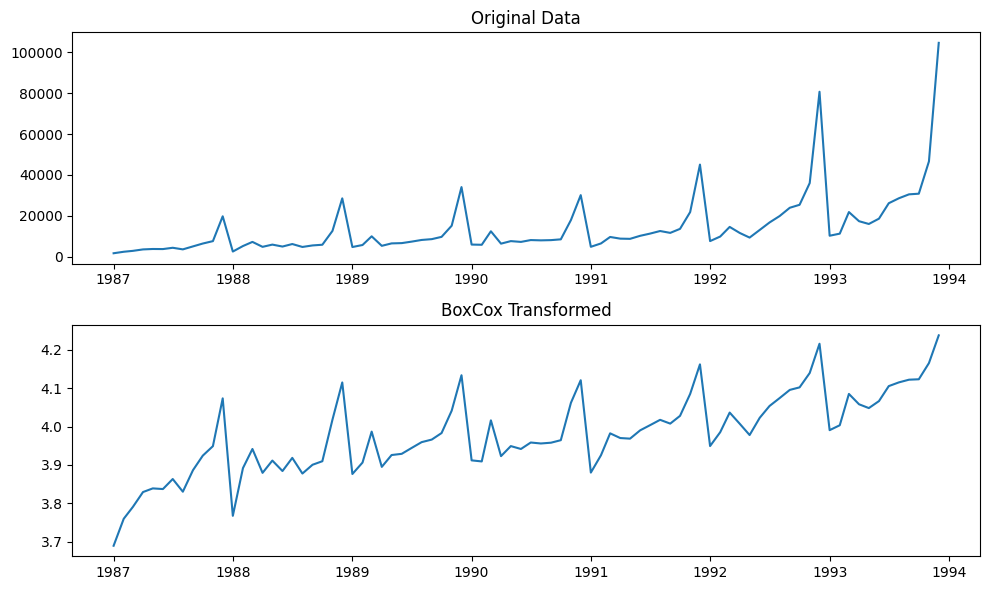

In [84]:
fig, ax = plt.subplots(2,1)

ax[0].plot(souvenirs['Sales'])
ax[0].set_title('Original Data')

ax[1].plot(souvenirs['sales_boxcox'])
ax[1].set_title('BoxCox Transformed')

plt.tight_layout()
plt.show()

In [85]:
sales_boxcox_diff = souvenirs['sales_boxcox'].diff().dropna()

adfuller_test(sales_boxcox_diff)
kpss_test(sales_boxcox_diff)

ADF Statistic: -3.398030
p-value: 0.011026
Critical Values:
	1%: -3.527
	5%: -2.904
	10%: -2.589
Result: The series is stationary
KPSS Statistic: 0.1636415088328506
p-value: 0.1
num lags: 20
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\nickc\AppData\Local\Temp\ipykernel_61000\726354897.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


The best estimate lambda for this time series is -0.22, in order to create uniform variance. After one order of differencing both the ADFuller and KPSS test confirms it stationarity.

## Exercise 5

For your retail data (from Exercise 7 in Section 2.10), find the appropriate order of differencing (after transformation if necessary) to obtain stationary data.

In [86]:
#| warning : false
#| message : false

aus_retail = pd.read_csv('c:/Users/nickc/DataScience/NickAMC.github.io/DATA_624_S24/rdata/aus_retail.csv', parse_dates=['Month'], index_col='Month')

takeaway = aus_retail.query('Industry == "Takeaway food services" & State == "Australian Capital Territory"')[['Turnover']]

C:\Users\nickc\AppData\Local\Temp\ipykernel_61000\558819073.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  aus_retail = pd.read_csv('c:/Users/nickc/DataScience/NickAMC.github.io/DATA_624_S24/rdata/aus_retail.csv', parse_dates=['Month'], index_col='Month')


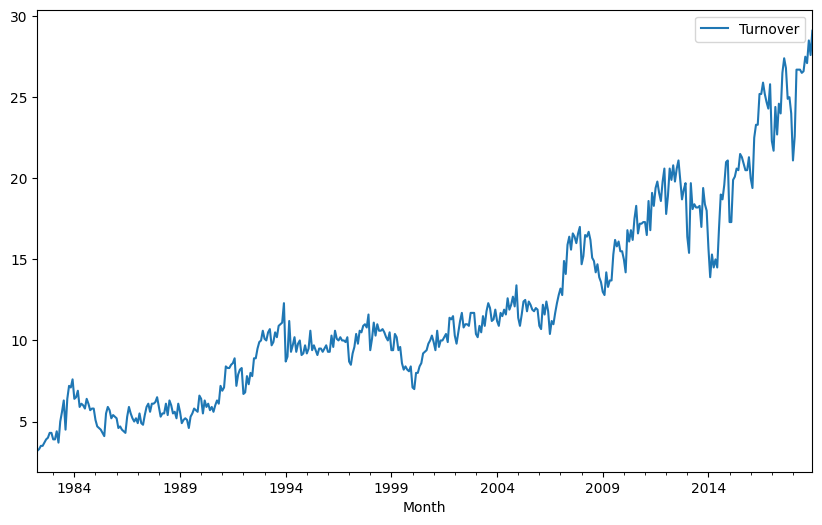

In [87]:
takeaway.plot()
plt.show()

In [88]:
turnover_boxcox, lmbda = boxcox(takeaway['Turnover'])
print(lmbda)

0.08194470335254905


Since the lambda estimate from the boxcox() function is very close to zero, we can use the log transform instead for better interpretibility.

In [89]:
takeaway['turnover_log'] = np.log(takeaway['Turnover'])

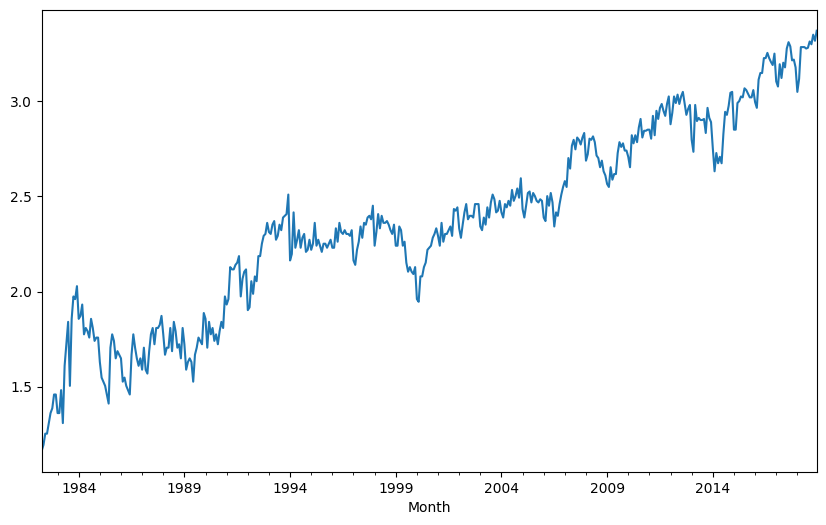

In [90]:
takeaway['turnover_log'].plot()
plt.show()

In [91]:
#| warning : false
#| message : false

adfuller_test(takeaway['Turnover'])
kpss_test(takeaway['Turnover'])

ADF Statistic: 1.378437
p-value: 0.997014
Critical Values:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Result: The series is not stationary
KPSS Statistic: 3.114617088478788
p-value: 0.01
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


C:\Users\nickc\AppData\Local\Temp\ipykernel_61000\726354897.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


After the transformation, the time series requires differencing.

In [92]:
turnover_log_diff = takeaway['turnover_log'].diff().dropna()

adfuller_test(turnover_log_diff)
kpss_test(turnover_log_diff)

ADF Statistic: -6.515463
p-value: 0.000000
Critical Values:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Result: The series is stationary
KPSS Statistic: 0.04900416256271348
p-value: 0.1
num lags: 9
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\nickc\AppData\Local\Temp\ipykernel_61000\726354897.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


We applied a log tranform to the data to create constant variance and using the ADFuller and KPSS test required one order of differencing.

## Exercise 6

Simulate and plot some data from simple ARIMA models.



a. Use the following R code to generate data from an AR(1) model with  $\phi_1 = 0.6$ and $\sigma^2 = 1$ . The process starts with  $y_1 = 0$.

In [93]:
phi_1 = 0.6
sigma_sq = 1 

n_samples = 1000

np.random.seed(1998)
# we need normal errors
epsilon = np.random.normal(0, np.sqrt(sigma_sq), size = n_samples)

# initialize the ar process 
y = np.zeros(n_samples)
y[0]= 0 # start with zero 

for i in range(1, n_samples) :
     y[i] = phi_1 * y[i-1] + epsilon[i] # equation for AR(1)

df = pd.DataFrame({'index' : range(1, n_samples+1), 'y':y})
df.set_index('index', inplace = True)

df

,y
index,
1,0.000000
2,0.349943
3,0.998934
4,-0.142503
5,1.070004
...,...
996,-0.469707
997,-1.043023
998,-2.624032


b. Produce a time plot for the series. How does the plot change as you change $\phi_1$
 ?

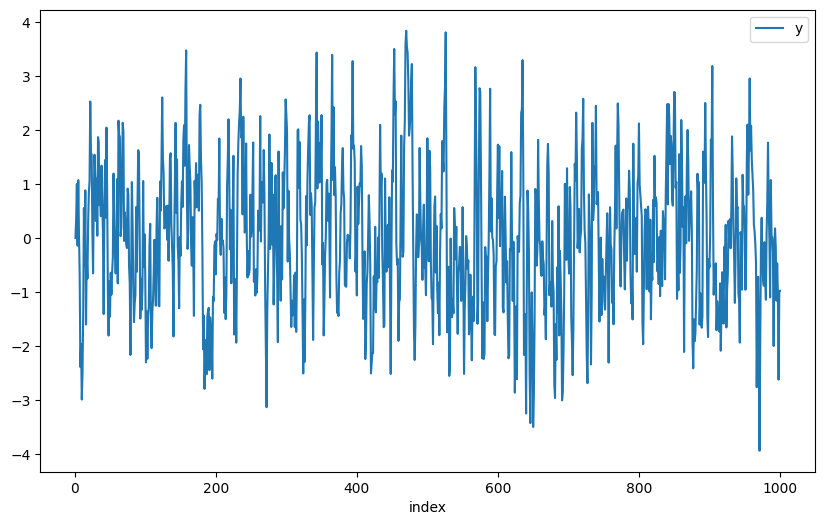

In [94]:
# for phi_1 = 0.6 
df.plot()
plt.show()

Changing it closer to 1.

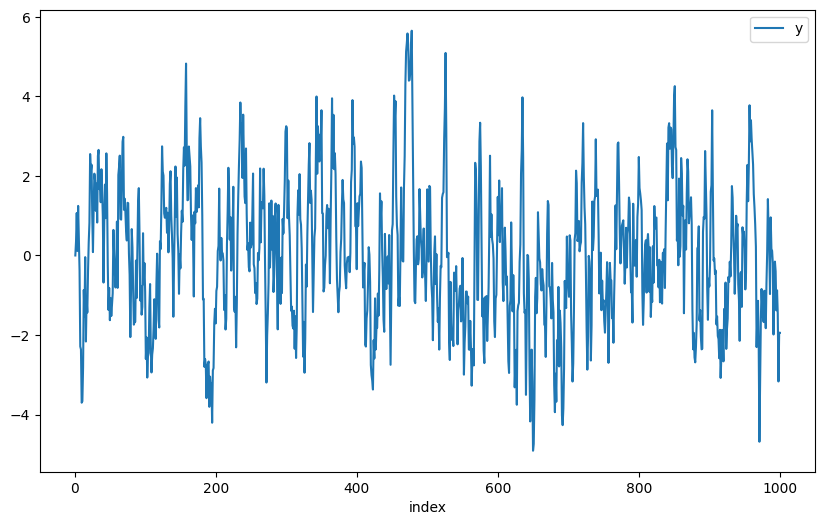

In [95]:
phi_1 = 0.8
sigma_sq = 1 

n_samples = 1000

np.random.seed(1998)
# we need normal errors
epsilon = np.random.normal(0, np.sqrt(sigma_sq), size = n_samples)

# initialize the ar process 
y = np.zeros(n_samples)
y[0]= 0 # start with zero 

for i in range(1, n_samples) :
     y[i] = phi_1 * y[i-1] + epsilon[i] # equation for AR(1)

df = pd.DataFrame({'index' : range(1, n_samples+1), 'y':y})
df.set_index('index', inplace = True)

df.plot()
plt.show()

Changing the value of phi_1 change the appearance of the plot since it influences the dependence on past values. The closer the value is to 1 the more weight it puts on past values to generate the current value.

c. Write your own code to generate data from an MA(1) model with $\theta_1 = 0.6$ and $\sigma^2 =1$.

In [96]:
theta_1 = 0.6

for i in range(1, n_samples) :
     y[i] = theta_1 * epsilon[i-1] + epsilon[i] # MA(1) process

df = pd.DataFrame({'index' : range(1, n_samples+1), 'y':y})
df.set_index('index', inplace = True)

df

,y
index,
1,0.000000
2,1.273549
3,0.998934
4,-0.268483
5,0.710387
...,...
996,-0.408712
997,-0.624392
998,-2.454938


d. Produce a time plot for the series. How does the plot change as you change $\theta_1$?

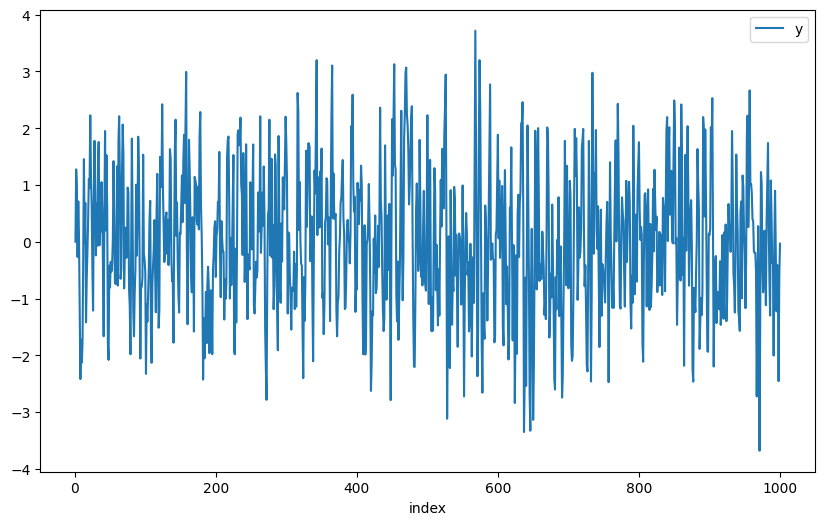

In [97]:
df.plot()
plt.show()

Similar to how changing $\phi_1$ affects the influence of the past values on the current. For an MA process, $\theta$ determines the weight or influence of the past error term. For instance, the 0.6 coefficient means that previous error term affects 60% of how the current value is calculated.

e. Generate data from an ARMA(1,1) model with $\phi_1 = 0.6, $ $\theta_1 = 0.6 $ and $\sigma^2 =1$.
 

In [98]:
for i in range(1, n_samples) :
     y[i] = (phi_1 * y[i-1]) + (theta_1 * epsilon[i-1]) + epsilon[i] # ARMA(1,1) process

arma_1_1 = pd.DataFrame({'index' : range(1, n_samples+1), 'y':y})
arma_1_1.set_index('index', inplace = True)

arma_1_1


,y
index,
1,0.000000
2,1.273549
3,2.017773
4,1.345736
5,1.786976
...,...
996,-1.704241
997,-1.987785
998,-4.045166


f. Generate data from an AR(2) model with  $\phi_1 = -0.8$,  $\phi_2 = 0.3$ and  $\sigma^2$ = 1. (Note that these parameters will give a non-stationary series.)



In [99]:
phi_1 = -0.8
phi_2 = 0.3

for i in range(1, n_samples) :
     y[i] = (phi_1 * y[i-1]) + (phi_2 * y[i-2]) + epsilon[i] # AR(2) process

ar_2 = pd.DataFrame({'index' : range(1, n_samples+1), 'y':y})
ar_2.set_index('index', inplace = True)

ar_2

,y
index,
1,0.000000e+00
2,-5.823837e-01
3,1.254876e+00
4,-1.920479e+00
5,3.068352e+00
...,...
996,-1.756314e+33
997,1.893716e+33
998,-2.041867e+33


g. Graph the latter two series and compare them

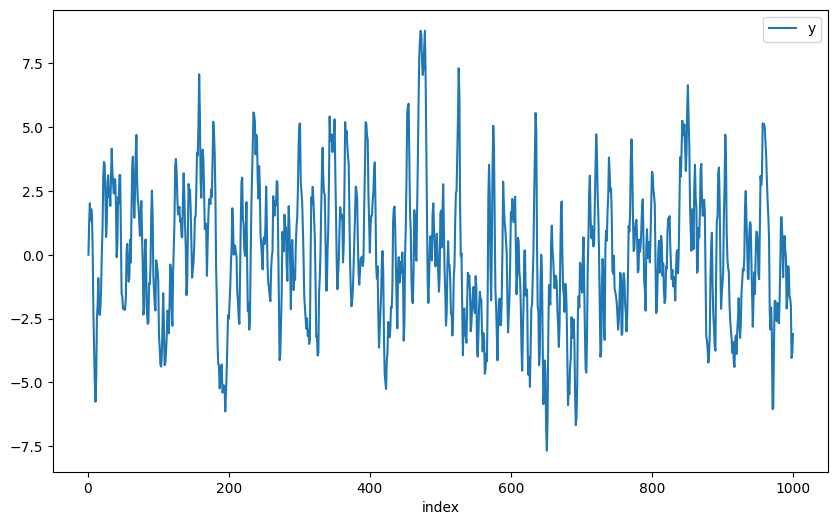

In [100]:
arma_1_1.plot()
plt.show()


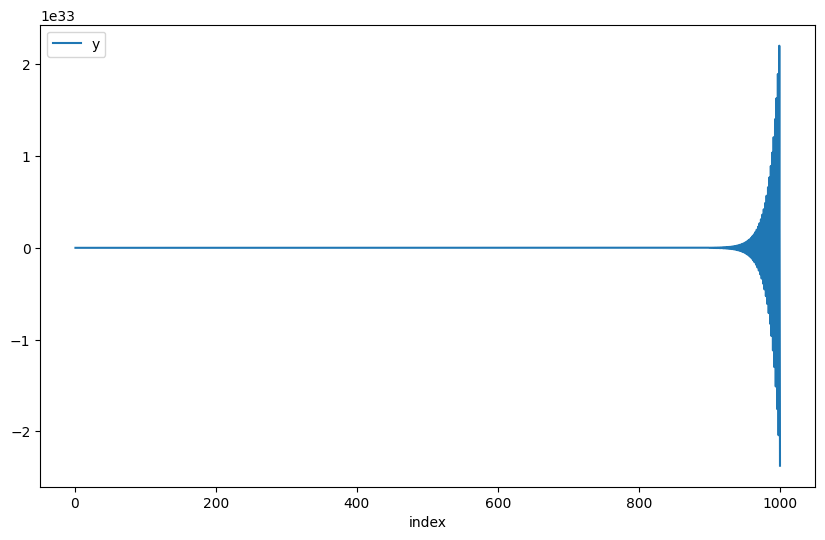

In [101]:
ar_2.plot()
plt.show()

The ARMA(1,1) plot suggests a stationary time series. In contrast, the AR(2) plot exhibits an exponentially increasing pattern, indicating non-stationarity and oscillating between positive and negative values.

## Exercise 7

Consider `aus_airpassengers`, the total number of passengers (in millions) from Australian air carriers for the period 1970-2011.

a. Use ARIMA() to find an appropriate ARIMA model. What model was selected. Check that the residuals look like white noise. Plot forecasts for the next 10 periods.


In [102]:
aus_airpassengers = pd.read_csv('c:/Users/nickc/DataScience/ aus_air_passengers.csv', parse_dates=['Year'], index_col = 'Year')[['Passengers']]

In [103]:
aus_airpassengers['Passengers_log'] = np.log(aus_airpassengers['Passengers'])

In [104]:
adfuller_test(aus_airpassengers['Passengers_log'])

ADF Statistic: -0.638129
p-value: 0.862132
Critical Values:
	1%: -3.581
	5%: -2.927
	10%: -2.602
Result: The series is not stationary


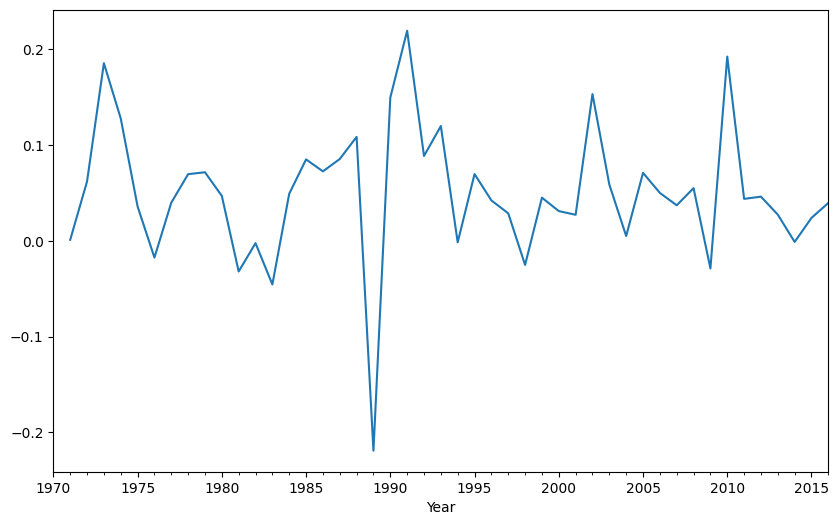

In [105]:
aus_airpassengers['Passengers_log_diff'] = aus_airpassengers['Passengers_log'].diff().dropna()
aus_airpassengers['Passengers_log_diff'].plot()
plt.show()

In [106]:
adfuller_test(aus_airpassengers['Passengers_log_diff'].dropna())

ADF Statistic: -6.751068
p-value: 0.000000
Critical Values:
	1%: -3.585
	5%: -2.928
	10%: -2.602
Result: The series is stationary


In [107]:
#| warning : false
#| messge : false

from statsmodels.tsa.arima.model import ARIMA

order_aic_bic = []

for p in range(5) :
     for q in range(5) :
          model = ARIMA(aus_airpassengers['Passengers_log'], order = (p,1,q)) # we know 1 order of differencing is needed
          results = model.fit()

          order_aic_bic.append((p,q, results.aic, results.bic))

c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency inform

In [108]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p','q','AIC','BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

print('*********************************')
# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

    p  q         AIC        BIC
6   1  1 -103.214373 -97.728449
8   1  3 -101.443426 -92.300219
11  2  1 -101.225130 -93.910564
7   1  2 -101.221874 -93.907308
16  3  1 -100.550607 -91.407400
12  2  2  -99.261196 -90.117989
13  2  3  -97.741436 -86.769588
21  4  1  -97.534145 -86.562296
14  2  4  -97.299704 -84.499214
17  3  2  -97.270571 -86.298722
22  4  2  -96.607655 -83.807165
18  3  3  -95.819941 -83.019451
5   1  0  -95.574901 -91.917618
19  3  4  -95.275631 -80.646500
23  4  3  -94.773243 -80.144112
1   0  1  -94.741843 -91.084560
10  2  0  -94.116678 -88.630754
15  3  0  -93.566368 -86.251802
24  4  4  -93.458743 -77.000970
2   0  2  -93.173761 -87.687836
0   0  0  -92.733049 -90.904408
3   0  3  -92.415079 -85.100514
20  4  0  -91.794478 -82.651271
4   0  4  -90.460376 -81.317169
9   1  4  -88.415091 -77.443243
*********************************
    p  q         AIC        BIC
6   1  1 -103.214373 -97.728449
11  2  1 -101.225130 -93.910564
7   1  2 -101.221874 -93.907308
8   1 

In [109]:
import pmdarima as pm 

auto_arima = pm.auto_arima(aus_airpassengers['Passengers_log'], information_criterion = 'aic',
trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-109.726, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-109.376, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-107.402, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-107.420, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-92.733, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-107.105, Time=0.19 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-106.223, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-105.376, Time=0.22 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-108.331, Time=0.17 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.15 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit ti

Due to the small size of the data, we suspsect that auto.arima is overfitting and thus we will go with the grid search approach where it found that ARIMA(1,1,1) best capture the data.

In [110]:
# 90-10 split of the time series data since the data is small
train = aus_airpassengers['Passengers_log'].iloc[:int(0.8 * len(aus_airpassengers['Passengers_log']))]
test = aus_airpassengers['Passengers_log'].iloc[int(0.8 * len(aus_airpassengers['Passengers_log'])):]

In [111]:
#| warning : false
#| message : false

# ARIMA(1,1,1)

arima_111 = ARIMA(train, order = (1,1,1))

results = arima_111.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:         Passengers_log   No. Observations:                   37
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  40.609
Date:                Wed, 13 Mar 2024   AIC                            -75.218
Time:                        19:05:00   BIC                            -70.468
Sample:                    01-01-1970   HQIC                           -73.560
                         - 01-01-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      0.028     35.505      0.000       0.945       1.055
ma.L1         -0.9873      0.931     -1.060      0.289      -2.812       0.838
sigma2         0.0058      0.005      1.203      0.2

c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


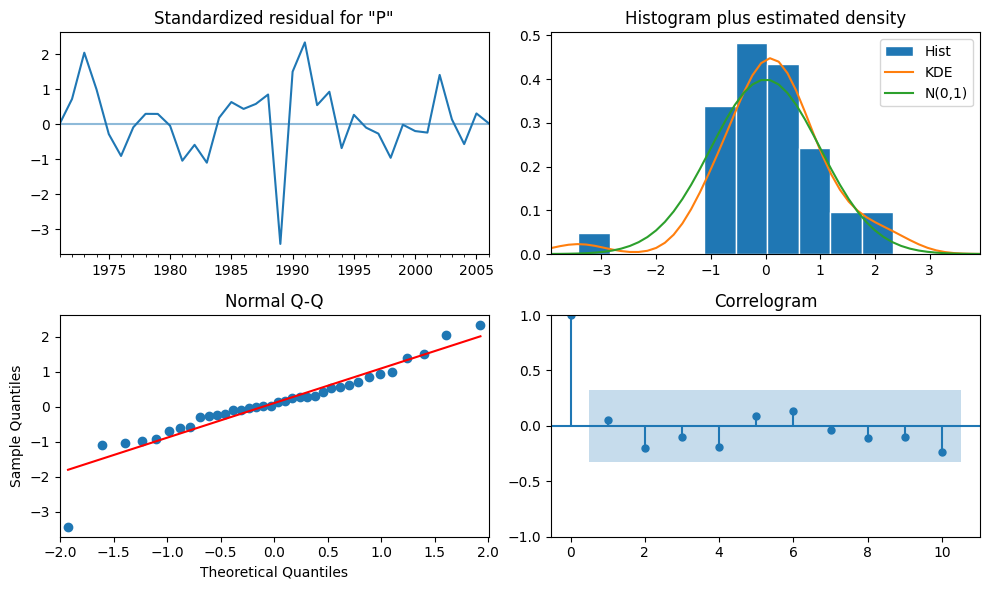

In [112]:
results.plot_diagnostics()
plt.tight_layout()
plt.show()

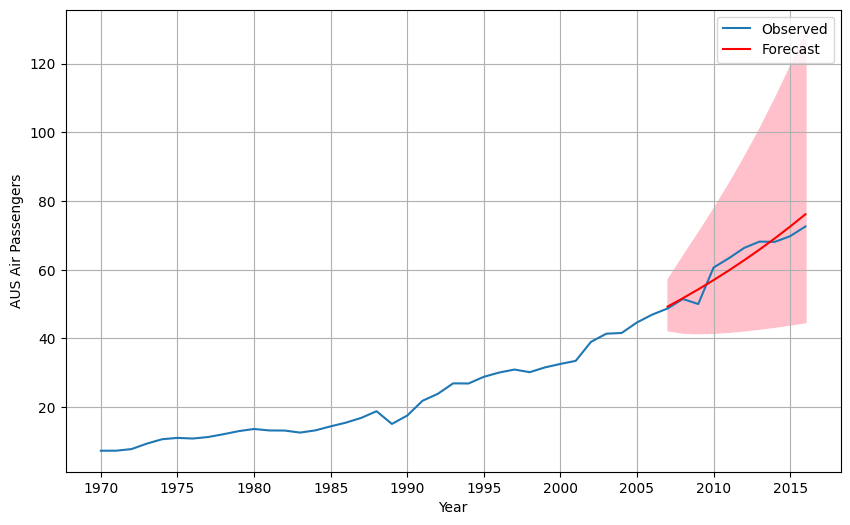

In [113]:
forecast = results.get_forecast(steps = 10)
mean_forecast = forecast.predicted_mean

conf_int = forecast.conf_int()


lower_limits = conf_int.loc[:,'lower Passengers_log']
upper_limits = conf_int.loc[:,'upper Passengers_log']


plt.plot(aus_airpassengers.index, aus_airpassengers['Passengers'], label = 'Observed')

plt.plot(mean_forecast.index, np.exp(mean_forecast), color = 'red', label = 'Forecast') 
# reversing log transform

plt.fill_between(lower_limits.index, np.exp(lower_limits), np.exp(upper_limits), color = 'pink')

plt.xlabel('Year')
plt.ylabel('AUS Air Passengers')
plt.legend()
plt.grid(True)
plt.show()

ARIMA(1,1,1) uses the autocorrelations from lagged values and lagged errors to capture the pattern of the data. While ARIMA(0,1,0) is essentially just a stationarity time series with Naive Drift being applied where it captures the overall trend of the data.


b. Write the model in terms of the backshift operator.


For ARIMA(1,1,1) model in terms of the backshift operator:
$$
(1 - \phi B) ( 1-B) y_t = c + (1 + \theta_1 B) \epsilon_t
$$

where p = 1, d = 1, and q = 1.


c. Plot forecasts from an ARIMA(0,1,0) model with drift and compare these to part a.


In [114]:
arima_010 = ARIMA(train, order = (0,1,0), trend='t') # t adds the drift

results2 = arima_010.fit()
print(results2.summary())

                               SARIMAX Results                                
Dep. Variable:         Passengers_log   No. Observations:                   37
Model:                 ARIMA(0, 1, 0)   Log Likelihood                  42.546
Date:                Wed, 13 Mar 2024   AIC                            -81.092
Time:                        19:05:01   BIC                            -77.925
Sample:                    01-01-1970   HQIC                           -79.987
                         - 01-01-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0516      0.013      3.886      0.000       0.026       0.078
sigma2         0.0055      0.001      6.484      0.000       0.004       0.007
Ljung-Box (L1) (Q):                   0.02   Jarque-

c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


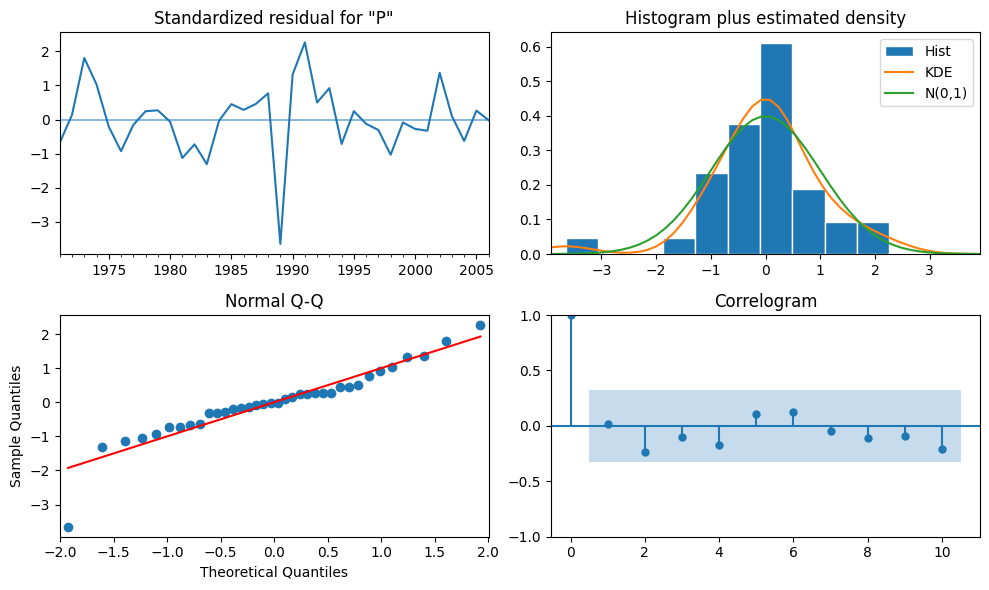

In [115]:
results2.plot_diagnostics()
plt.tight_layout()
plt.show()

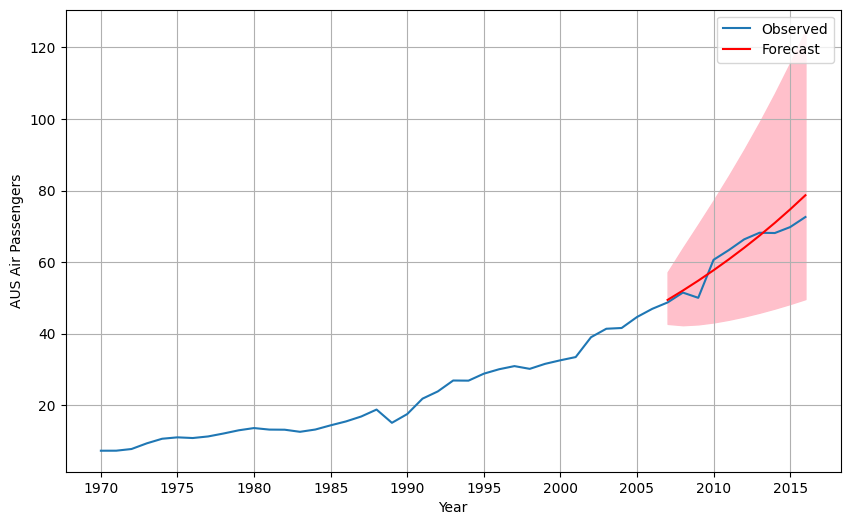

In [116]:
forecast = results2.get_forecast(steps = 10)
mean_forecast = forecast.predicted_mean

conf_int = forecast.conf_int()


lower_limits = conf_int.loc[:,'lower Passengers_log']
upper_limits = conf_int.loc[:,'upper Passengers_log']


plt.plot(aus_airpassengers.index, aus_airpassengers['Passengers'], label = 'Observed')

plt.plot(mean_forecast.index, np.exp(mean_forecast), color = 'red', label = 'Forecast') 
# reversing log transform

plt.fill_between(lower_limits.index, np.exp(lower_limits), np.exp(upper_limits), color = 'pink')

plt.xlabel('Year')
plt.ylabel('AUS Air Passengers')
plt.legend()
plt.grid(True)
plt.show()

ARIMA(1,1,1) uses the autocorrelations from lagged values and lagged errors to capture the pattern of the data. While ARIMA(0,1,0) is essentially just a stationarity time series with linear Drift being applied where it captures the overall trend of the data. We tried to applying a constant drift but the code would not run so instead we used a linear drift.


d. Plot forecasts from an ARIMA(2,1,2) model with drift and compare these to parts a and c. Remove the constant and see what happens.


c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:         Passengers_log   No. Observations:                   37
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  46.051
Date:                Wed, 13 Mar 2024   AIC                            -80.101
Time:                        19:05:02   BIC                            -70.600
Sample:                    01-01-1970   HQIC                           -76.785
                         - 01-01-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0503      0.005      9.637      0.000       0.040       0.061
ar.L1         -0.0071      0.448     -0.016      0.987      -0.885       0.871
ar.L2          0.3707      0.420      0.882      0.3

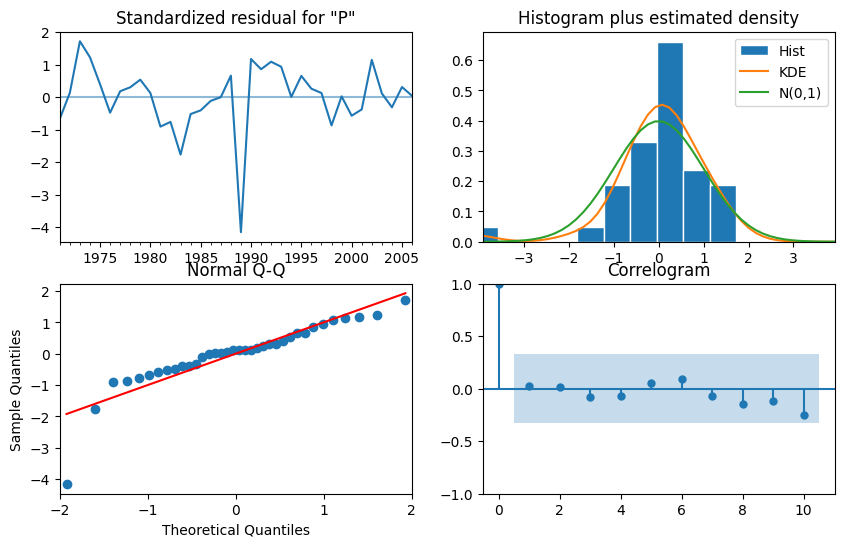

In [117]:
arima_212 = ARIMA(train, order = (2,1,2), trend='t') # add drift

results3 = arima_212.fit()

print(results3.summary())

results3.plot_diagnostics()
plt.show()

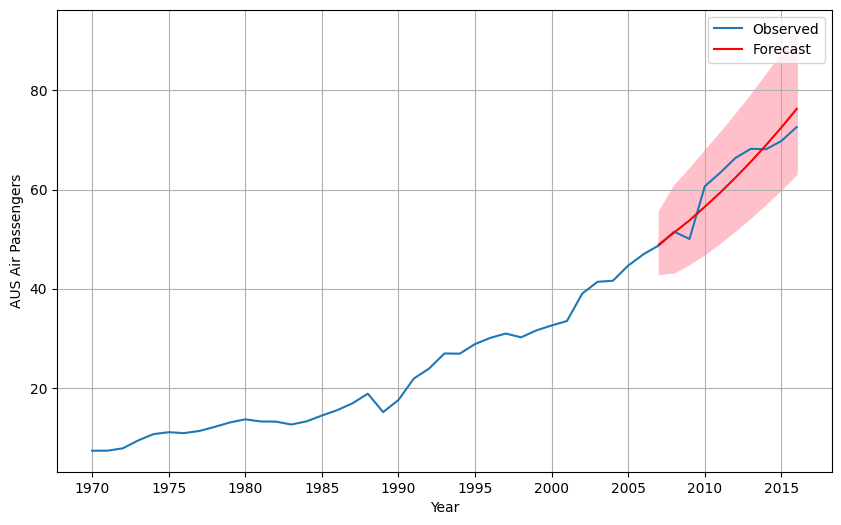

In [118]:

forecast = results3.get_forecast(steps = 10)
mean_forecast = forecast.predicted_mean

conf_int = forecast.conf_int()


lower_limits = conf_int.loc[:,'lower Passengers_log']
upper_limits = conf_int.loc[:,'upper Passengers_log']


plt.plot(aus_airpassengers.index, aus_airpassengers['Passengers'], label = 'Observed')

plt.plot(mean_forecast.index, np.exp(mean_forecast), color = 'red', label = 'Forecast') 
# reversing log transform

plt.fill_between(lower_limits.index, np.exp(lower_limits), np.exp(upper_limits), color = 'pink')

plt.xlabel('Year')
plt.ylabel('AUS Air Passengers')
plt.legend()
plt.grid(True)
plt.show()

Visually ARIMA(2,1,2) looks similar to previous two models but adding drift we noticed that the confidence intervals narrows due to more parameters and the drift correctly capturing the trend, thus reducing the overall uncertainty.


e. Plot forecasts from an ARIMA(0,2,1) model with a constant. What happens?


In [119]:
arima_021 = ARIMA(train, order=(0,2,1), trend='n') # other values for trend wont run the code

results4 = arima_021 .fit()

print(results4.summary())

                               SARIMAX Results                                
Dep. Variable:         Passengers_log   No. Observations:                   37
Model:                 ARIMA(0, 2, 1)   Log Likelihood                  39.078
Date:                Wed, 13 Mar 2024   AIC                            -74.155
Time:                        19:05:03   BIC                            -71.044
Sample:                    01-01-1970   HQIC                           -73.081
                         - 01-01-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9952      2.660     -0.374      0.708      -6.209       4.218
sigma2         0.0057      0.015      0.388      0.698      -0.023       0.034
Ljung-Box (L1) (Q):                   0.07   Jarque-

c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


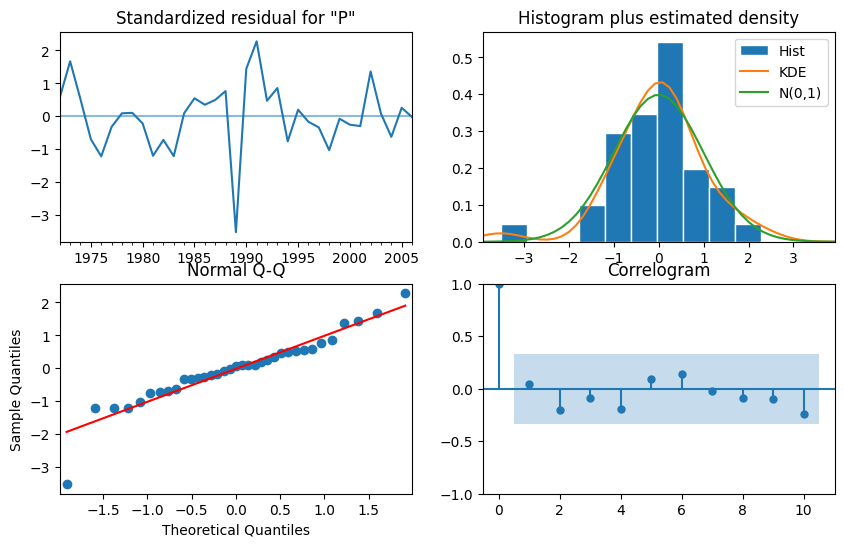

In [120]:
results4.plot_diagnostics()
plt.show()

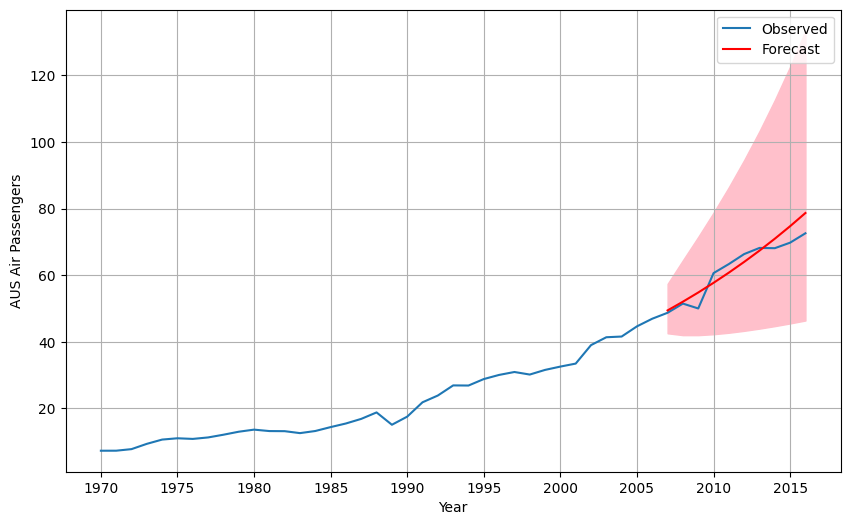

In [121]:
forecast = results4.get_forecast(steps = 10)
mean_forecast = forecast.predicted_mean

conf_int = forecast.conf_int()


lower_limits = conf_int.loc[:,'lower Passengers_log']
upper_limits = conf_int.loc[:,'upper Passengers_log']


plt.plot(aus_airpassengers.index, aus_airpassengers['Passengers'], label = 'Observed')

plt.plot(mean_forecast.index, np.exp(mean_forecast), color = 'red', label = 'Forecast') 
# reversing log transform

plt.fill_between(lower_limits.index, np.exp(lower_limits), np.exp(upper_limits), color = 'pink')

plt.xlabel('Year')
plt.ylabel('AUS Air Passengers')
plt.legend()
plt.grid(True)
plt.show()

# Exercise 8

For the United States GDP series (from global_economy):

a. if necessary, find a suitable Box-Cox transformation for the data;


In [122]:
us_gdp = global_economy.query('Country == "United States"')[['GDP']]

In [123]:
gdp_boxcox, lmbda = boxcox(us_gdp['GDP'])
print(lmbda)

0.24036371825364905



b. fit a suitable ARIMA model to the transformed data using ARIMA();


In [124]:
adfuller_test(gdp_boxcox)

ADF Statistic: -1.124577
p-value: 0.705172
Critical Values:
	1%: -3.553
	5%: -2.915
	10%: -2.595
Result: The series is not stationary


In [125]:
us_gdp['gdp_boxcox'] = gdp_boxcox
us_gdp['gdp_boxcox_diff'] = us_gdp['gdp_boxcox'].diff()

In [126]:
adfuller_test(us_gdp['gdp_boxcox_diff'].dropna())

ADF Statistic: -4.670636
p-value: 0.000096
Critical Values:
	1%: -3.553
	5%: -2.915
	10%: -2.595
Result: The series is stationary


In [127]:
#| warning : false
#| message : false

# usiung  grid search for p and q 
order_aic_bic = []

for p in range(5) :
     for q in range(5) :
          model = ARIMA(us_gdp['gdp_boxcox'], order = (p,1,q))
          results = model.fit()

          order_aic_bic.append((p,q, results.aic, results.bic))

# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p','q','AIC','BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))


c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency inform

    p  q         AIC         BIC
7   1  2  523.658050  531.830255
11  2  1  523.887230  532.059435
6   1  1  524.628237  530.757391
16  3  1  525.526537  535.741793
8   1  3  525.630822  535.846078
12  2  2  525.639806  535.855063
21  4  1  527.280101  539.538408
17  3  2  527.512626  539.770934
9   1  4  527.516250  539.774558
13  2  3  527.618591  539.876899
20  4  0  528.953169  539.168425
15  3  0  529.050685  537.222890
14  2  4  529.132898  543.434257
18  3  3  529.328489  543.629847
22  4  2  529.331172  543.632531
23  4  3  529.541534  545.885944
19  3  4  530.040500  546.384910
10  2  0  530.216908  536.346062
24  4  4  531.259994  549.647456
5   1  0  532.192013  536.278115
4   0  4  560.886713  571.101970
3   0  3  568.981582  577.153787
2   0  2  578.973630  585.102784
1   0  1  600.688589  604.774691
0   0  0  648.214911  650.257962


c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


From this double for loop then using the AIC as our metric, it suggests that ARIMA(1,1,2) is the best model for the data.


c. try some other plausible models by experimenting with the orders chosen;


Another way to select p and q is by using the ACF and PACF plots.

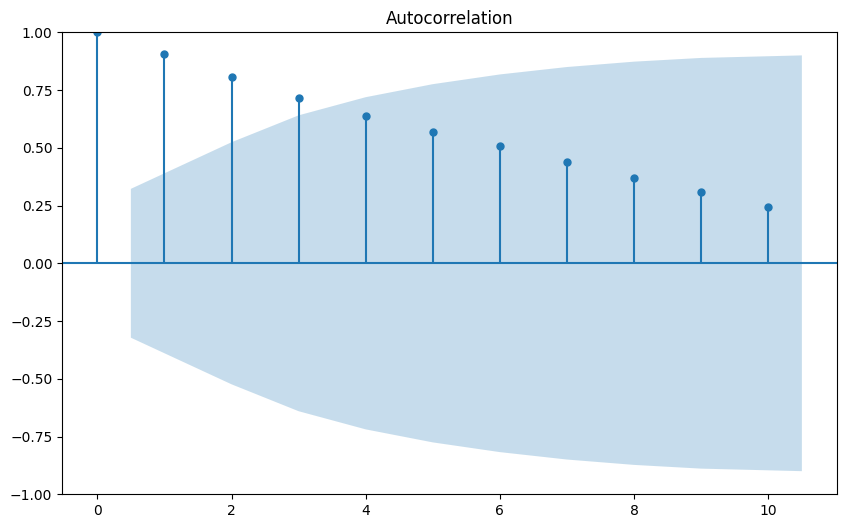

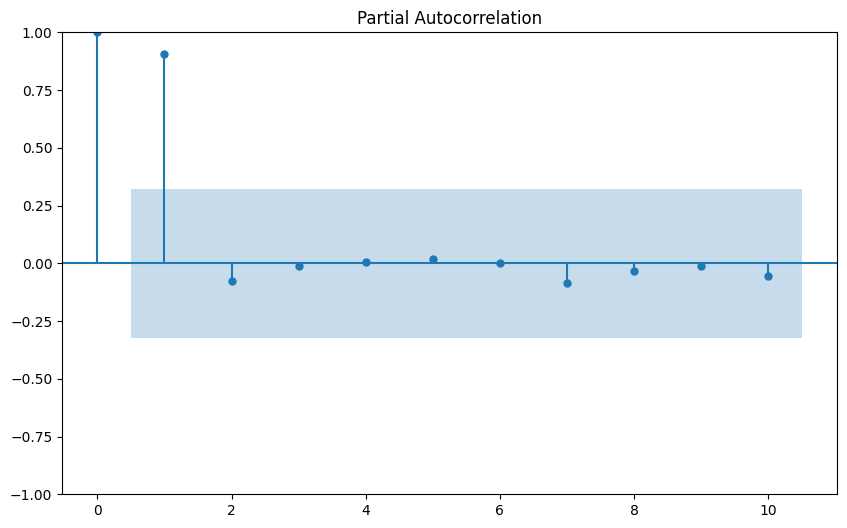

In [128]:
plot_acf(train, lags =10)
plot_pacf(train, lags =10)
plt.show()

From this, we get an ARIMA(1,1,3) model from plots. Using the number of significant correlation beyond lag 0 as the potential values for p and q.


d. choose what you think is the best model and check the residual diagnostics;


We add a linear drift since the data closely resembles a straight line.

In [129]:
#| warning : false
#| message : false

arima_112 = ARIMA(us_gdp['gdp_boxcox'], order = (1,1,2), trend='t')
result_112 = arima_112.fit()

arima_113 = ARIMA(us_gdp['gdp_boxcox'], order = (1,1,3), trend = 't')
result_113 = arima_113.fit()

c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency inform

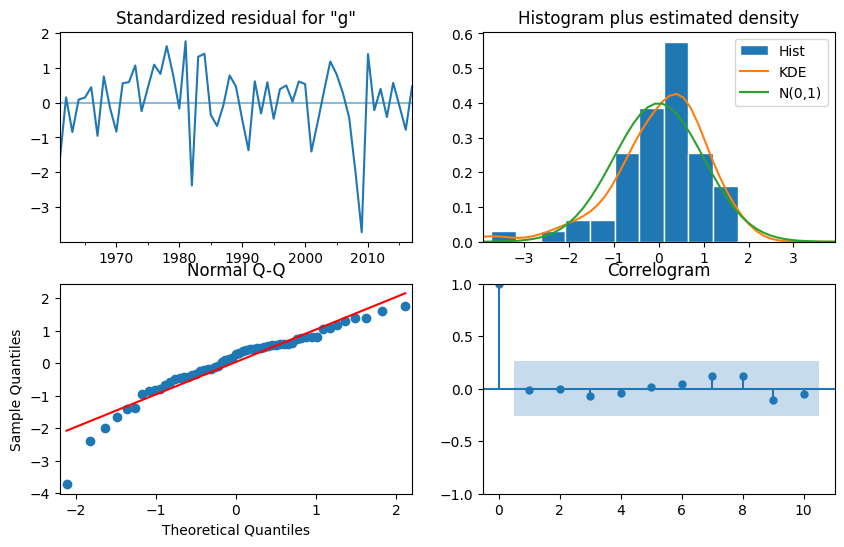

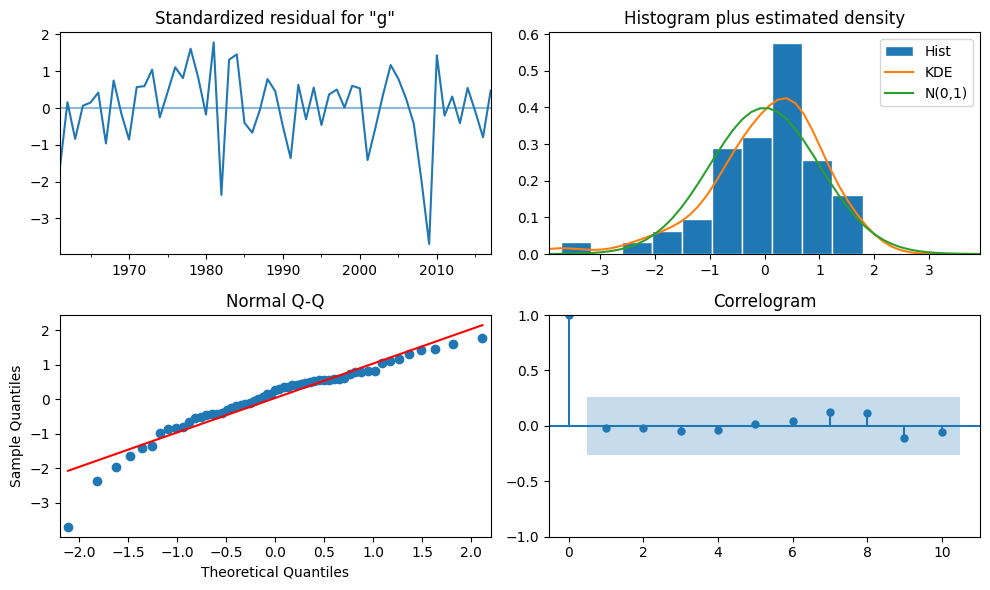

In [130]:
result_112.plot_diagnostics()
result_113.plot_diagnostics()
plt.tight_layout()
plt.show()

Since both models' residuals look identical, we have to use the AIC as the metric. We will use ARIMA(1,1,2) to generate forecast since it has the lower aic value.


e. produce forecasts of your fitted model. Do the forecasts look reasonable?


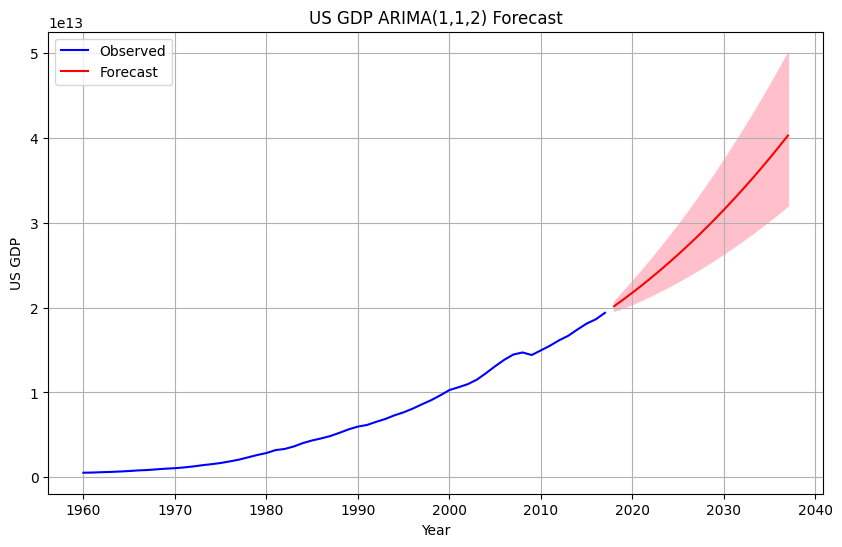

In [131]:
from scipy.special import inv_boxcox

forecast = result_112.get_forecast(steps = 20) # forecast the next 20 time steps
mean_forecast = forecast.predicted_mean

conf_int = forecast.conf_int()

lower_limits = conf_int.loc[:,'lower gdp_boxcox']
upper_limits = conf_int.loc[:,'upper gdp_boxcox']

# TODO : dont forget to reverse the boxcox tranformation

plt.plot(us_gdp.index, us_gdp['GDP'], color = 'blue', label = 'Observed')

plt.plot(mean_forecast.index, inv_boxcox(mean_forecast,lmbda), color = 'red', label = 'Forecast')

plt.fill_between(lower_limits.index, inv_boxcox(lower_limits,lmbda), inv_boxcox(upper_limits,lmbda), color = 'pink')

plt.xlabel('Year')
plt.ylabel('US GDP')
plt.title('US GDP ARIMA(1,1,2) Forecast')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


f. compare the results with what you would obtain using ETS() (with no transformation).

c:\Users\nickc\DataScience\ds_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


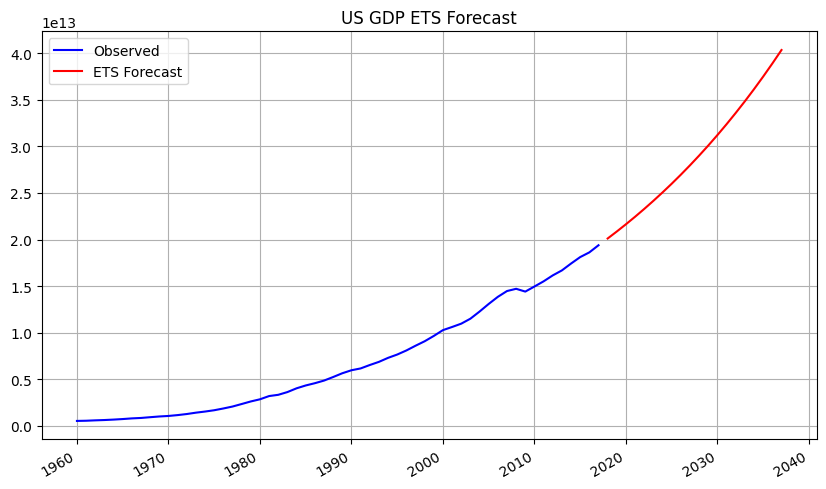

In [132]:
#| warning : false
#| message : false

from statsmodels.tsa.exponential_smoothing.ets import ETSModel

model = ETSModel(us_gdp['GDP'], trend = 'mul', damped_trend = False, seasonal=None).fit()

ets_forecast = model.forecast(steps = 20)

plt.plot(us_gdp.index, us_gdp['GDP'], color = 'blue', label = 'Observed')
ets_forecast.plot(label='ETS Forecast', color = 'red')
plt.legend()
plt.title('US GDP ETS Forecast')
plt.grid(True)
plt.show()

---